Import firedrake and icepack. Initialize simple mesh.

In [1]:
import firedrake
import icepack
import matplotlib.pyplot as plt
import numpy as np

Lx = 10
nx = 10

mesh = firedrake.IntervalMesh(nx, Lx)
Q = firedrake.FunctionSpace(mesh, "CG", 2)
V = firedrake.VectorFunctionSpace(mesh, "CG", 1)

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


Define initial geometry.

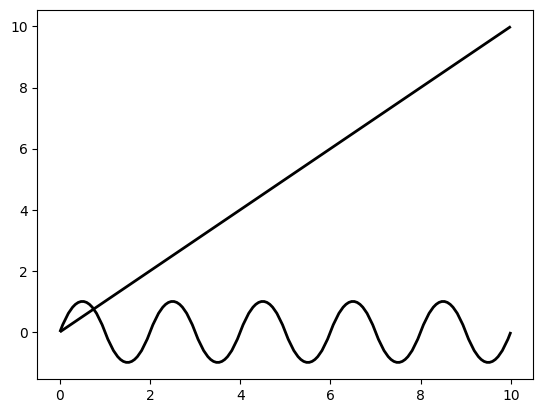

In [2]:
from firedrake import max_value, min_value

#x,z = firedrake.SpatialCoordinate(mesh)
x, = firedrake.SpatialCoordinate(mesh)

h0 = firedrake.interpolate(firedrake.sin(x*3.14159),Q);
x0 = firedrake.interpolate(x,Q)
fig, axes = plt.subplots()
firedrake.plot(h0, axes = axes)
firedrake.plot(x0, axes = axes);

Change something about the data (update it).

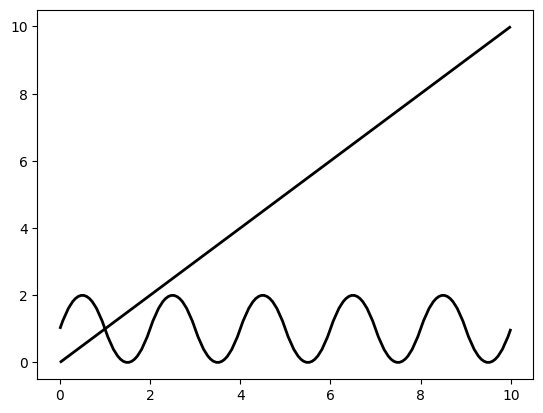

In [3]:
h1 = firedrake.interpolate(h0+1,Q);
fig, axes = plt.subplots()
firedrake.plot(h1, axes = axes);
firedrake.plot(x0, axes = axes);

Adjust mesh space.

In [4]:
Lx1 = 5

# mesh.coordinates.dat.data[:] *= Lx1/Lx
# mesh.clear_spatial_index()
# mesh.clear_cell_sizes()

mesh_adj = firedrake.IntervalMesh(nx, Lx1)

Q_adj = firedrake.FunctionSpace(mesh_adj, "CG", 2)
V_adj = firedrake.VectorFunctionSpace(mesh_adj, "CG", 1)

x_adj, = firedrake.SpatialCoordinate(mesh_adj)

In [ ]:
print(type(h1))

In [5]:
points = np.linspace(0,Lx1,num=nx+1)
print(points)

point_arr = []

for i in range(len(points)):
    point_arr.append([points[i]])

print(point_arr)

h0_points = h0.at(points)
print(h0_points)

#h0_point_func = firedrake.interpolate(h0,Q_adj)

mesh_adj_vo = firedrake.VertexOnlyMesh(mesh, point_arr)
Q_vo = firedrake.FunctionSpace(mesh_adj_vo,"DG")

h0_point_func = firedrake.interpolate(h0,Q_vo)

#print(mesh_adj_vo.dat.data_ro)
#print(type(mesh_adj_vo))
#print(mesh_adj_vo.coordinates)

# fig, axes = plt.subplots()
# firedrake.plot(h0_point_func, axes = axes)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[[0.0], [0.5], [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0]]
[array(-1.33226763e-15), array(1.), array(2.65358979e-06), array(-1.), array(-5.30717959e-06), array(1.), array(7.96076938e-06), array(-1.), array(-1.06143592e-05), array(1.), array(1.3267949e-05)]


TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [ ]:
# h1_adj = firedrake.interpolate(h1, Q_adj)
h1_adj = firedrake.Function(firedrake.functionspaceimpl.WithGeometry.create(h1.function_space(), mesh_adj), val=h1.topological) # Throws error when switching meshes

# x0_adj = firedrake.interpolate(x_adj, Q)

fig, axes = plt.subplots()
firedrake.plot(h1_adj, axes = axes)
#firedrake.plot(x_adj, axes = axes)

In [ ]:
# points = [[0.0],[0.5],[1.0],[1.5],[2.0],[2.5],[3.0]]
# vom = firedrake.VertexOnlyMesh(mesh, points)
# PODG = firedrake.FunctionSpace(vom, "DG", 0)
# f_at_points = firedrake.interpolate(h0, PODG)
# #f_at_points2 = firedrake.interpolate(f_at_points, Q)

# print(f_at_points.dat.data_ro)
# print(type(f_at_points))

# print(h0.dat.data_ro)
# print(type(h0))
# #firedrake.plot(f_at_points, axes = axes);

In [ ]:
# vom2 = firedrake.IntervalMesh(10,5)
# Q2 = firedrake.FunctionSpace(vom2, "CG", 1)
# #h2 = firedrake.interpolate(h0, Q2)

# print(h0.dat.data_ro)
# #print(h2.dat.data_ro)

# fig, axes = plt.subplots()
# firedrake.plot(h0, axes = axes);
# #firedrake.plot(h2, axes = axes);

Plot profile and use some point evals.

In [ ]:
fig, axes = plt.subplots()
firedrake.plot(h0, axes=axes);
print(h0.dat.data_ro)

h0_test = h0.at(1,1.2,1.4,1.6,1.8,2)
h0_test2 = h0.at(1.1)
h0_test3 = h0.at(1.2)

print(h0_test)
print(h0_test[0])
print(h0_test2)
print(h0_test[1])
print(h0_test3)


Resize mesh coordinates.

In [ ]:
Lx1 = 5

mesh.coordinates.dat.data[:] *= Lx1/Lx
mesh.clear_spatial_index()
mesh.clear_cell_sizes()

# Vc = mesh.coordinates.function_space()
# x1, = firedrake.SpatialCoordinate(mesh)
# f = firedrake.Function(Vc).interpolate(firedrake.as_vector([x]))
# mesh.coordinates.assign(f);

#print(h0.dat.data_ro)

Get section of h0 function over the new coordinate space.

In [ ]:
print(x)
print(firedrake.SpatialCoordinate(mesh))
# dir(x)

In [ ]:
h1 = firedrake.interpolate(h0,Q);
# h1 = firedrake.Function(firedrake.functionspaceimpl.WithGeometry.create(h0.function_space(), mesh), val=h0.topological)
fig, axes = plt.subplots()
firedrake.plot(h1, axes=axes);

#test = h0.at(x)

#h1 = firedrake.interpolate(remesh(x),Q)
#print(h0.dat.data_ro)
#print(h1.dat.data_ro)
#print(h0.at(x))

In [ ]:
m = V.ufl_domain()
W = firedrake.FunctionSpace(m, V.ufl_element())
X = firedrake.interpolate(m.coordinates, W)
f = firedrake.Function(V)

f.dat.data[:] = x.dat.data